In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=f633539f83701a2a23ea87d68706a59663d8cab2a491828d97b3e5f0370396cd
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


**Load the Dataset**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/creditcard.csv')

**Data Preprocessing**

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Applying UMAP**
To reduce the dimensionality of the data to two dimensions for visualization purposes.

In [5]:
from umap import UMAP

# Initialize UMAP
umap = UMAP(n_components=2, random_state=42)

# Transform the data
X_umap = umap.fit_transform(X_scaled)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


**Visualize the results of UMAP to understand the data structure**

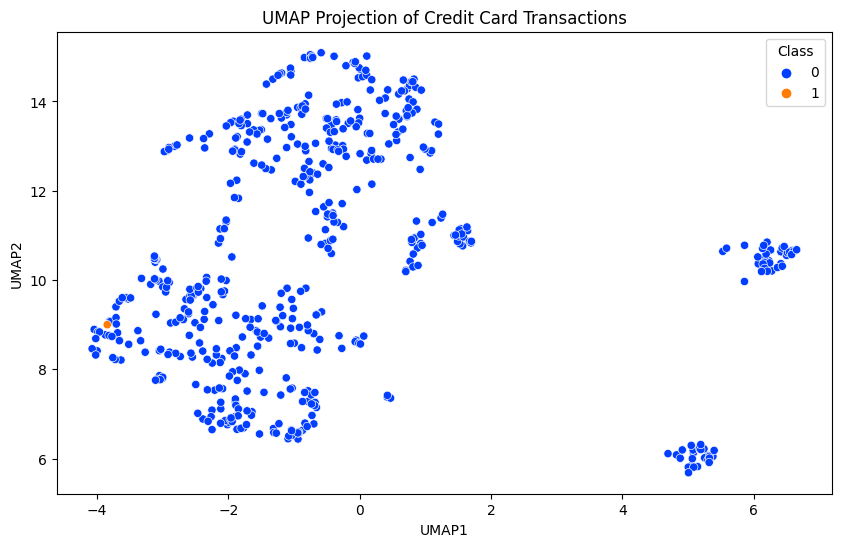

In [6]:
# Create a DataFrame for visualization
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Class'] = y

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Class', palette='bright')
plt.title('UMAP Projection of Credit Card Transactions')
plt.show()


**K-Means clustering on the reduced dimensions**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


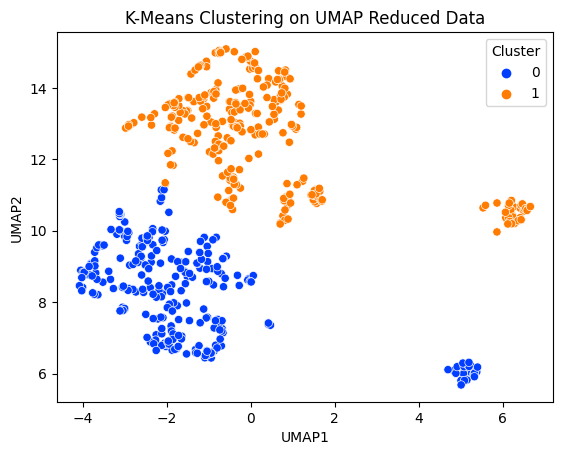

In [7]:
from sklearn.cluster import KMeans

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
umap_df['Cluster'] = kmeans.fit_predict(X_umap)

# Visualize Clusters
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='bright')
plt.title('K-Means Clustering on UMAP Reduced Data')
plt.show()


**Classification task using the transformed data**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       165
           1       0.00      0.00      0.00         1

    accuracy                           0.99       166
   macro avg       0.50      0.50      0.50       166
weighted avg       0.99      0.99      0.99       166

[[165   0]
 [  1   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
